In [52]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# import dependencies
import pandas as pd
import numpy as np
from collections import Counter
import os
import pickle


# For visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Set style for plots
sns.set_style("whitegrid")


# scikit-learn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from tensorflow.keras.models import load_model
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline


# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

# Classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:blue;overflow:hidden; font-family: 'Tahoma'"><b> Loading the Data </b></div>
<a id="loading-the-data"></a>

In [2]:
df = pd.read_csv('Comprehensive_Banking_Database.csv')
df.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:blue;overflow:hidden; font-family: 'Tahoma'"><b> Data Overview </b></div>
<a id="data-overview"></a>`

In [3]:
df.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Age', 'Gender', 'Address',
       'City', 'Contact Number', 'Email', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'TransactionID',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Branch ID', 'Loan ID',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term',
       'Approval/Rejection Date', 'Loan Status', 'CardID', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due',
       'Payment Due Date', 'Last Credit Card Payment Date', 'Rewards Points',
       'Feedback ID', 'Feedback Date', 'Feedback Type', 'Resolution Status',
       'Resolution Date', 'Anomaly'],
      dtype='object')

In [4]:
# Dataset shape
df.shape

(5000, 40)

In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

**It can be deduced that all rows and columns were filled; No `Null` values.**

In [6]:
# Data types of each column
df.dtypes

Customer ID                            int64
First Name                            object
Last Name                             object
Age                                    int64
Gender                                object
Address                               object
City                                  object
Contact Number                         int64
Email                                 object
Account Type                          object
Account Balance                      float64
Date Of Account Opening               object
Last Transaction Date                 object
TransactionID                          int64
Transaction Date                      object
Transaction Type                      object
Transaction Amount                   float64
Account Balance After Transaction    float64
Branch ID                              int64
Loan ID                                int64
Loan Amount                          float64
Loan Type                             object
Interest R

In [7]:
df.isnull().sum()

Customer ID                          0
First Name                           0
Last Name                            0
Age                                  0
Gender                               0
Address                              0
City                                 0
Contact Number                       0
Email                                0
Account Type                         0
Account Balance                      0
Date Of Account Opening              0
Last Transaction Date                0
TransactionID                        0
Transaction Date                     0
Transaction Type                     0
Transaction Amount                   0
Account Balance After Transaction    0
Branch ID                            0
Loan ID                              0
Loan Amount                          0
Loan Type                            0
Interest Rate                        0
Loan Term                            0
Approval/Rejection Date              0
Loan Status              

In [8]:
# check numerical summary statistics
df.describe()

,Customer ID,Age,Contact Number,Account Balance,TransactionID,Transaction Amount,Account Balance After Transaction,Branch ID,Loan ID,Loan Amount,Interest Rate,Loan Term,CardID,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Feedback ID,Anomaly
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.469800,1.945880e+10,5060.570918,2500.500000,2508.501144,5037.418898,50.586800,2500.500000,25501.042806,5.505038,36.520800,2500.500000,5549.035830,2487.40084,124.370134,4966.161800,2500.500000,0.880000
std,1443.520003,15.145672,1.443520e+03,2849.356481,1443.520003,1450.194986,4053.220017,28.499539,1443.520003,14039.732628,2.629752,16.924315,1443.520003,2581.718105,1446.80295,72.340102,2901.410915,1443.520003,0.475021
min,1.000000,18.000000,1.945879e+10,107.200000,1.000000,10.570000,-4878.760000,1.000000,1.000000,1006.370000,1.000000,12.000000,1.000000,1007.000000,1.45000,0.070000,1.000000,1.000000,-1.000000
25%,1250.750000,30.000000,1.945880e+10,2582.777500,1250.750000,1241.150000,2047.205000,26.000000,1250.750000,13315.305000,3.200000,24.000000,1250.750000,3314.065000,1243.51750,62.180000,2475.250000,1250.750000,1.000000
50%,2500.500000,43.000000,1.945880e+10,5075.500000,2500.500000,2494.025000,5089.785000,50.000000,2500.500000,25909.705000,5.520000,36.000000,2500.500000,5567.485000,2461.62000,123.080000,4950.500000,2500.500000,1.000000
75%,3750.250000,57.000000,1.945880e+10,7509.760000,3750.250000,3796.222500,8036.367500,75.000000,3750.250000,37441.570000,7.832500,48.000000,3750.250000,7786.040000,3722.58000,186.125000,7483.250000,3750.250000,1.000000
max,5000.000000,69.000000,1.945880e+10,9998.110000,5000.000000,4998.390000,14911.380000,99.000000,5000.000000,49993.490000,10.000000,60.000000,5000.000000,9997.780000,4997.11000,249.860000,9999.000000,5000.000000,1.000000


In [9]:
# Check unique values to confirm there are no unusual data entries
df.nunique()

Customer ID                          5000
First Name                             50
Last Name                              50
Age                                    52
Gender                                  3
Address                              5000
City                                   40
Contact Number                       5000
Email                                2139
Account Type                            2
Account Balance                      4991
Date Of Account Opening              3738
Last Transaction Date                 365
TransactionID                        5000
Transaction Date                      365
Transaction Type                        3
Transaction Amount                   4972
Account Balance After Transaction    4984
Branch ID                              99
Loan ID                              5000
Loan Amount                          5000
Loan Type                               3
Interest Rate                         900
Loan Term                         

In [10]:
# Checking for duplicate values
df.duplicated().sum()

0

In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create summary table
summary_data = []
for col in categorical_cols:
    summary_data.append({
        'Feature': col,
        'Count': df[col].count(),
        'Unique': df[col].nunique(),
        'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
        'Frequency': df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None
    })

# Create dataframe from summary
categorical_summary_df = pd.DataFrame(summary_data)

# Display the summary
print("Categorical Features Summary:")
print(categorical_summary_df.to_string(index=False))

Categorical Features Summary:
                      Feature  Count  Unique                Mode  Frequency
                   First Name   5000      50             Timothy        124
                    Last Name   5000      50               Adams        121
                       Gender   5000       3              Female       1727
                      Address   5000    5000           Address_1          1
                         City   5000      40            San Jose        163
                        Email   5000    2139 emily.adams@kag.com          8
                 Account Type   5000       2             Savings       2507
      Date Of Account Opening   5000    3738           1/10/2001          5
        Last Transaction Date   5000     365           1/23/2023         27
             Transaction Date   5000     365            5/2/2023         25
             Transaction Type   5000       3             Deposit       1698
                    Loan Type   5000       3            Mo

In [12]:
# Drop irrelevant or high-cardinality columns
columns_to_drop = [
    'Customer ID', 'First Name', 'Last Name', 'Address', 'Email', 'Contact Number',
    'TransactionID', 'Branch ID', 'Loan ID', 'CardID', 'Feedback ID'
]
df = df.drop(columns=columns_to_drop)

In [13]:
df.head()

,Age,Gender,City,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,Transaction Date,Transaction Type,Transaction Amount,...,Credit Card Balance,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,45,Male,Fort Worth,Current,1313.38,5/26/2006,4/23/2023,12/7/2023,Withdrawal,1457.61,...,4524.32,226.22,11/26/2023,3/20/2023,8142,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,47,Female,Louisville,Current,5988.46,3/2/2006,1/27/2023,4/27/2023,Deposit,1660.99,...,856.70,42.84,11/5/2023,6/16/2023,4306,4/7/2023,Complaint,Resolved,8/27/2023,1
2,25,Female,Philadelphia,Current,8277.88,7/19/2015,1/1/2023,4/5/2023,Deposit,839.91,...,3242.36,162.12,1/8/2023,3/20/2023,4842,9/7/2023,Praise,Pending,5/11/2023,1
3,52,Other,Oklahoma City,Savings,7487.21,1/30/2008,8/2/2023,7/28/2023,Withdrawal,4908.89,...,4329.17,216.46,9/8/2023,10/15/2023,9463,5/28/2023,Complaint,Resolved,7/5/2023,1
4,68,Other,Phoenix,Savings,6993.55,5/25/2021,3/27/2023,1/16/2023,Transfer,589.07,...,25.72,1.29,3/4/2023,7/27/2023,2209,2/12/2023,Complaint,Resolved,11/21/2023,1


In [14]:
# Convert date columns to datetime format
date_columns = [
    'Date Of Account Opening', 'Last Transaction Date', 'Transaction Date',
    'Approval/Rejection Date', 'Payment Due Date',
    'Last Credit Card Payment Date', 'Feedback Date', 'Resolution Date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [15]:
df['Credit Limit'].nunique

<bound method IndexOpsMixin.nunique of 0       1737.88
1       1799.36
2       6112.96
3       2069.41
4       2765.30
         ...   
4995    4347.17
4996    8379.59
4997    8208.84
4998    3083.35
4999    2015.38
Name: Credit Limit, Length: 5000, dtype: float64>

In [16]:
df.columns

Index(['Age', 'Gender', 'City', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'Transaction Date',
       'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term', 'Approval/Rejection Date', 'Loan Status',
       'Card Type', 'Credit Limit', 'Credit Card Balance',
       'Minimum Payment Due', 'Payment Due Date',
       'Last Credit Card Payment Date', 'Rewards Points', 'Feedback Date',
       'Feedback Type', 'Resolution Status', 'Resolution Date', 'Anomaly'],
      dtype='object')

In [17]:
df['Anomaly'].value_counts()

Anomaly
 1    4700
-1     300
Name: count, dtype: int64

In [18]:
# Replace -1 with 0 in the Anomaly column
df['Anomaly'] = df['Anomaly'].replace(-1, 0)

print(df['Anomaly'].value_counts())


Anomaly
1    4700
0     300
Name: count, dtype: int64


Numerical columns: ['Age', 'Account Balance', 'Transaction Amount', 'Account Balance After Transaction', 'Loan Amount', 'Interest Rate', 'Loan Term', 'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due', 'Rewards Points', 'Anomaly']


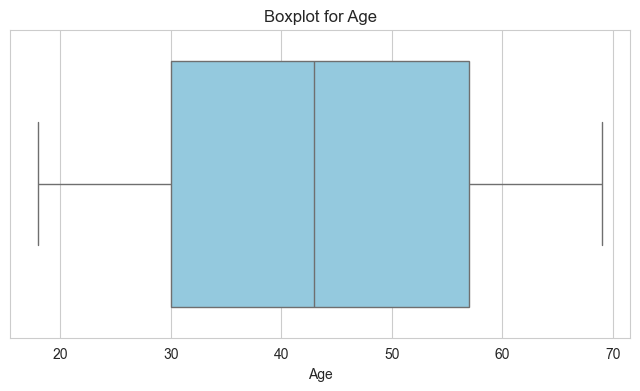

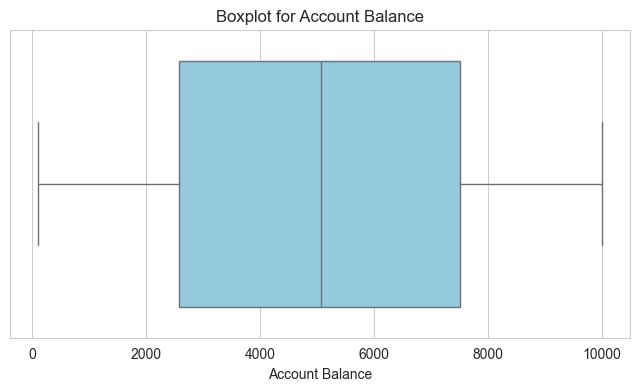

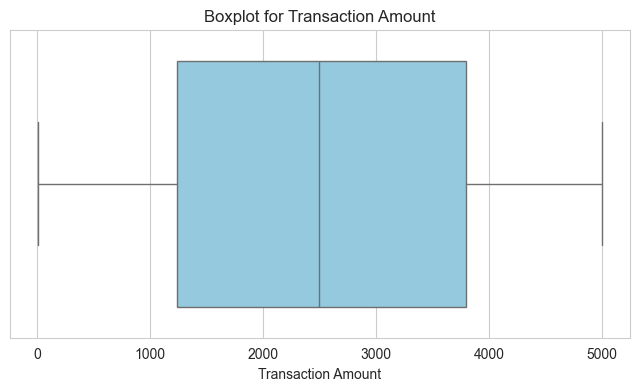

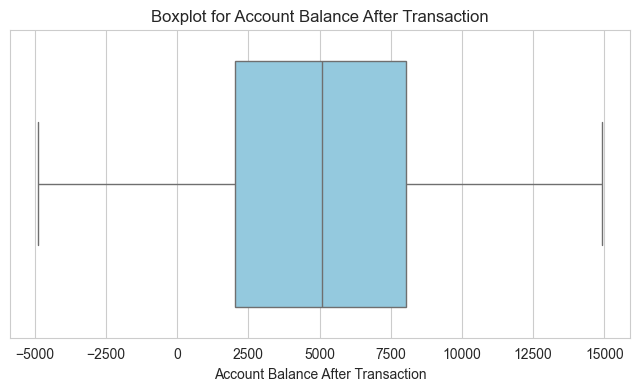

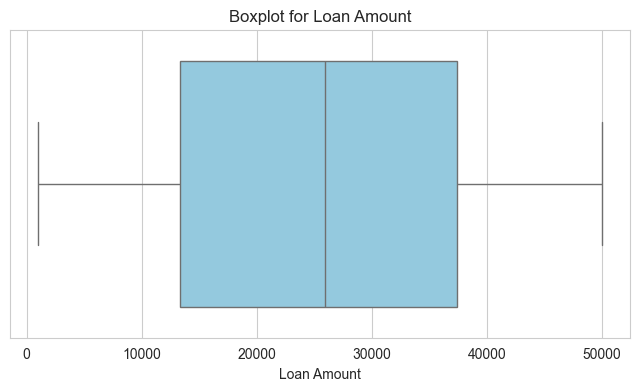

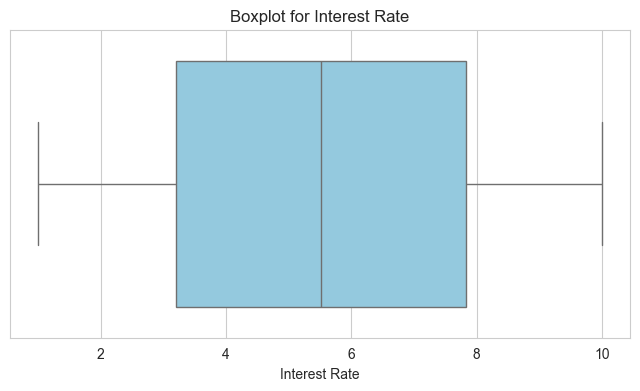

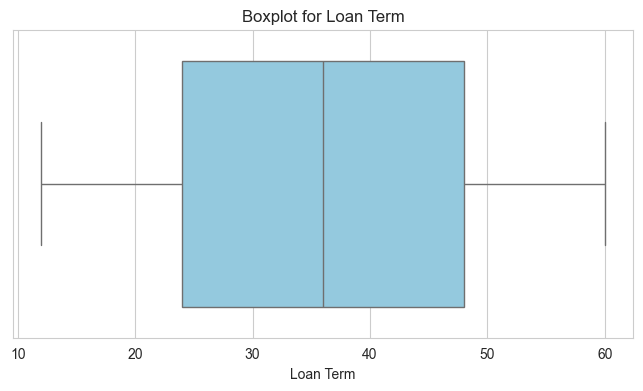

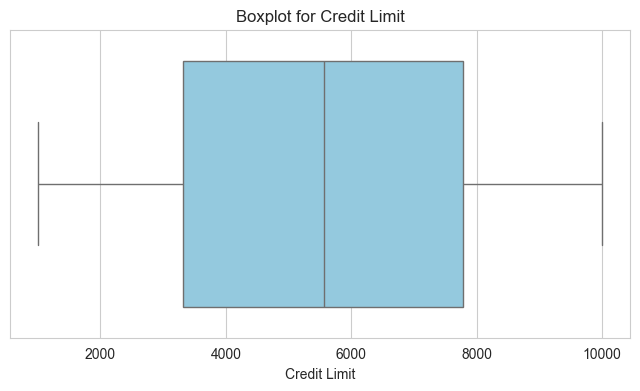

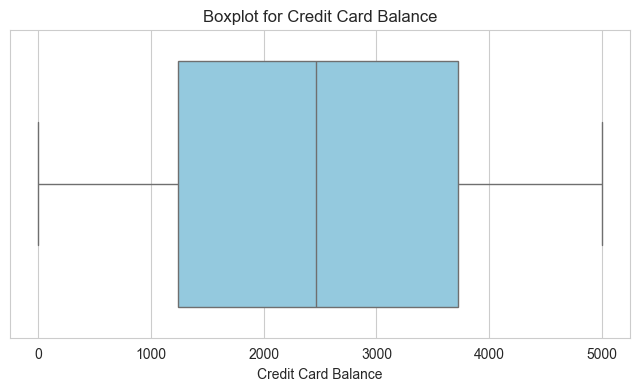

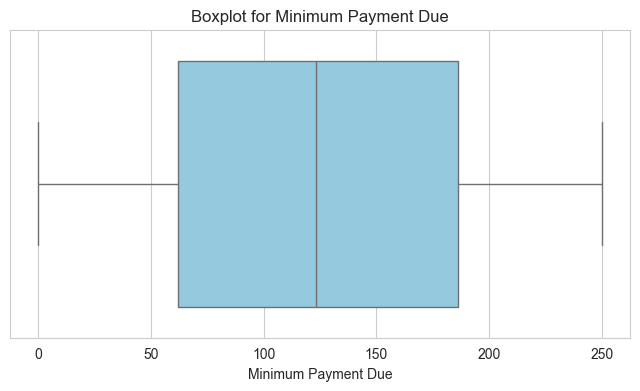

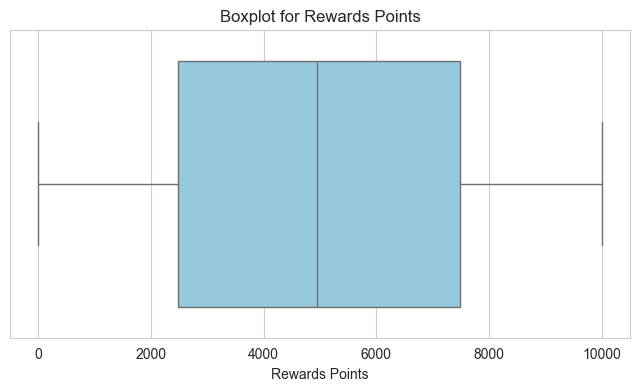

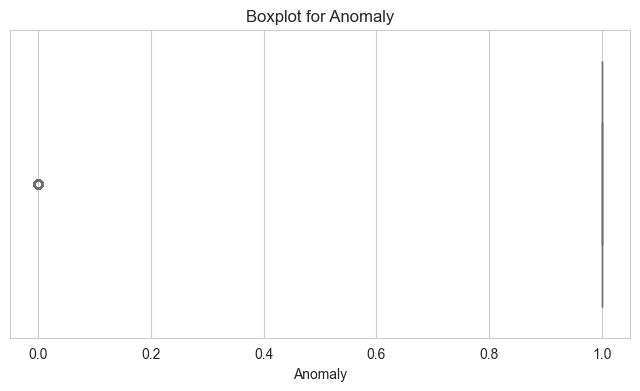

In [19]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.show()

In [20]:
# Outlier Detection using Z-score

def detect_outliers_zscore(df, columns, threshold=3):
    outlier_dict = {}

    for col in columns:
        z_scores = zscore(df[col].dropna())
        abs_z_scores = np.abs(z_scores)
        outliers = abs_z_scores > threshold
        outlier_count = np.sum(outliers)
        
        outlier_dict[col] = {
            'outlier_count': outlier_count,
            'outlier_percentage': round(outlier_count / df[col].dropna().shape[0] * 100, 2)
        }

    return pd.DataFrame(outlier_dict).T


zscore_outliers = detect_outliers_zscore(df, numerical_cols)
print(zscore_outliers.sort_values(by='outlier_count', ascending=False))


                                   outlier_count  outlier_percentage
Anomaly                                    300.0                 6.0
Age                                          0.0                 0.0
Account Balance                              0.0                 0.0
Transaction Amount                           0.0                 0.0
Account Balance After Transaction            0.0                 0.0
Loan Amount                                  0.0                 0.0
Interest Rate                                0.0                 0.0
Loan Term                                    0.0                 0.0
Credit Limit                                 0.0                 0.0
Credit Card Balance                          0.0                 0.0
Minimum Payment Due                          0.0                 0.0
Rewards Points                               0.0                 0.0


Text(0.5, 1.0, 'Credit Card Balance by Anomaly Flag')

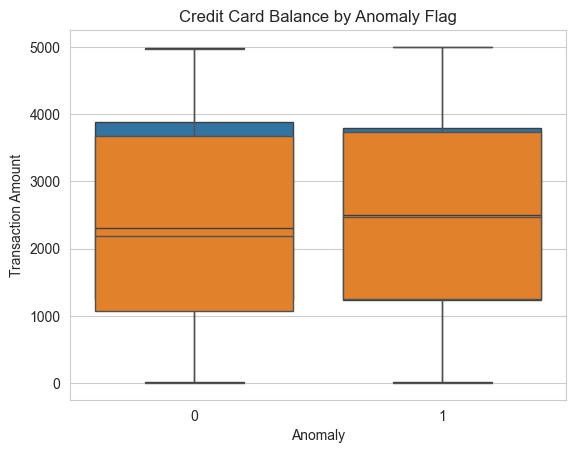

In [21]:
# Compare transaction amounts of anomaly vs normal
sns.boxplot(data=df, x='Anomaly', y='Transaction Amount')
plt.title('Transaction Amount by Anomaly Flag')

# Compare credit card balances
sns.boxplot(data=df, x='Anomaly', y='Credit Card Balance')
plt.title('Credit Card Balance by Anomaly Flag')

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:blue;overflow:hidden; font-family: 'Tahoma'"><b> Visualization </b></div>
<a id="Visual"></a>

Text(0, 0.5, 'Frequency')

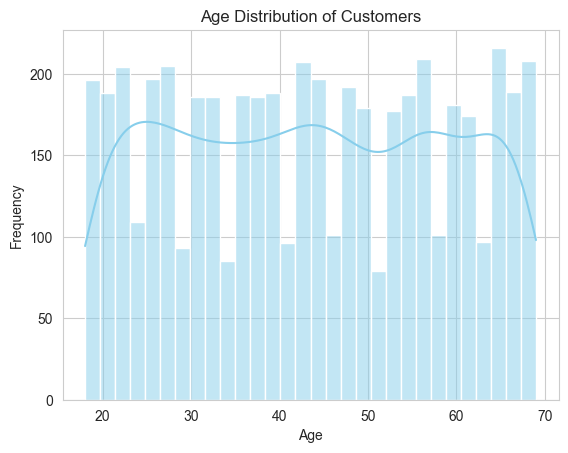

In [22]:
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Gender Distribution')

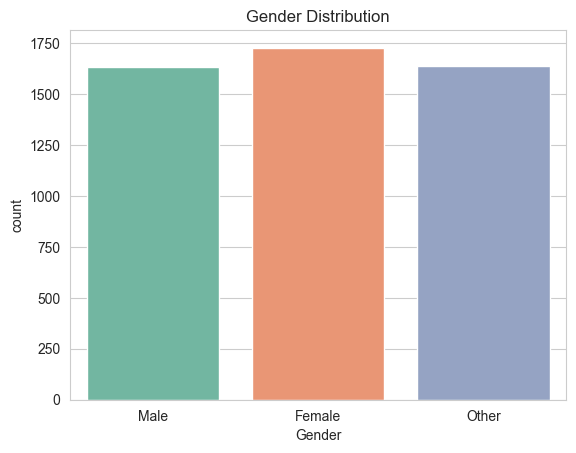

In [23]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Account Balance by Account Type')

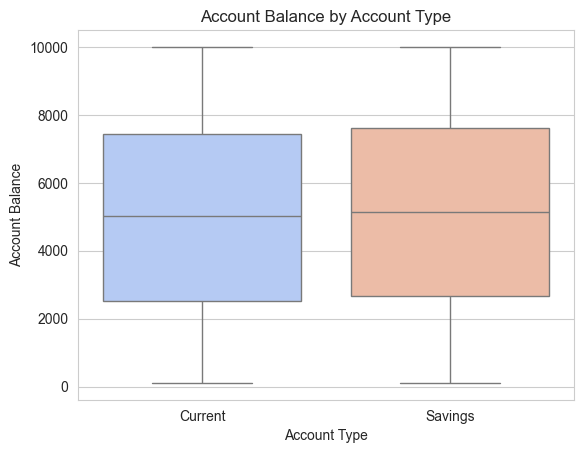

In [24]:
sns.boxplot(data=df, x='Account Type', y='Account Balance', palette='coolwarm')
plt.title('Account Balance by Account Type')

Text(0.5, 1.0, 'Customer Tenure Distribution')

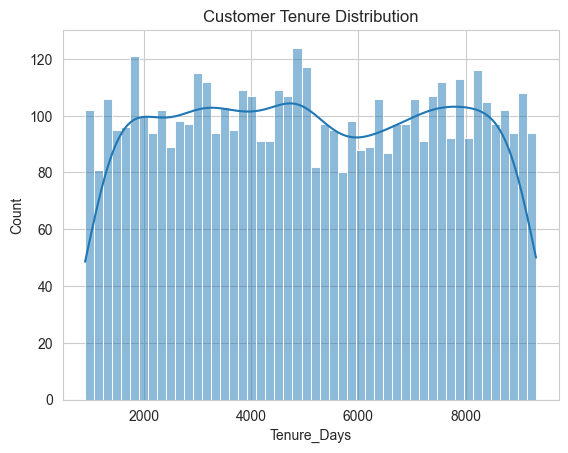

In [25]:
df['Date Of Account Opening'] = pd.to_datetime(df['Date Of Account Opening'])
df['Tenure_Days'] = (pd.to_datetime('today') - df['Date Of Account Opening']).dt.days
sns.histplot(df['Tenure_Days'], bins=50, kde=True)
plt.title('Customer Tenure Distribution')

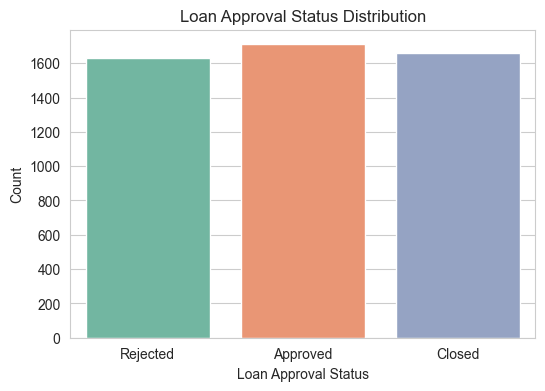

In [26]:
# Loan Approval Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Loan Status', palette='Set2')
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.show()

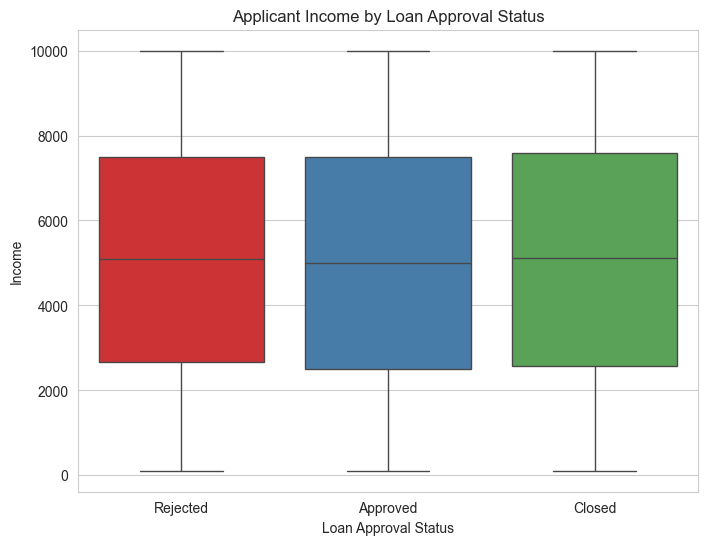

In [27]:
# Income Distribution by Loan Approval Status
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Loan Status', y='Account Balance', palette='Set1')
plt.title('Applicant Income by Loan Approval Status')
plt.xlabel('Loan Approval Status')
plt.ylabel('Income')
plt.show()

Text(0.5, 1.0, 'Monthly Transaction Frequency')

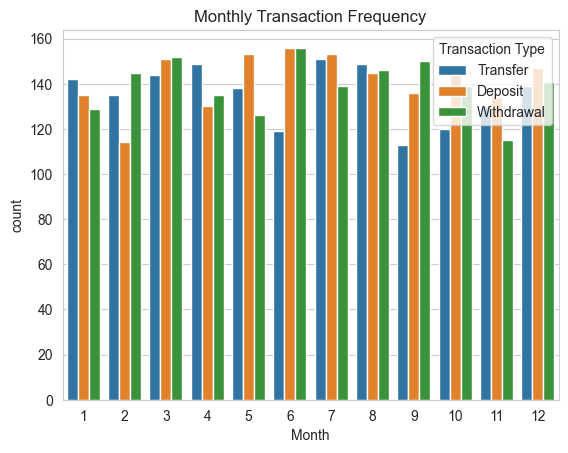

In [28]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.month
sns.countplot(data=df, x='Month', hue='Transaction Type')
plt.title('Monthly Transaction Frequency')

Text(0.5, 1.0, 'Feedback Type vs Resolution Status')

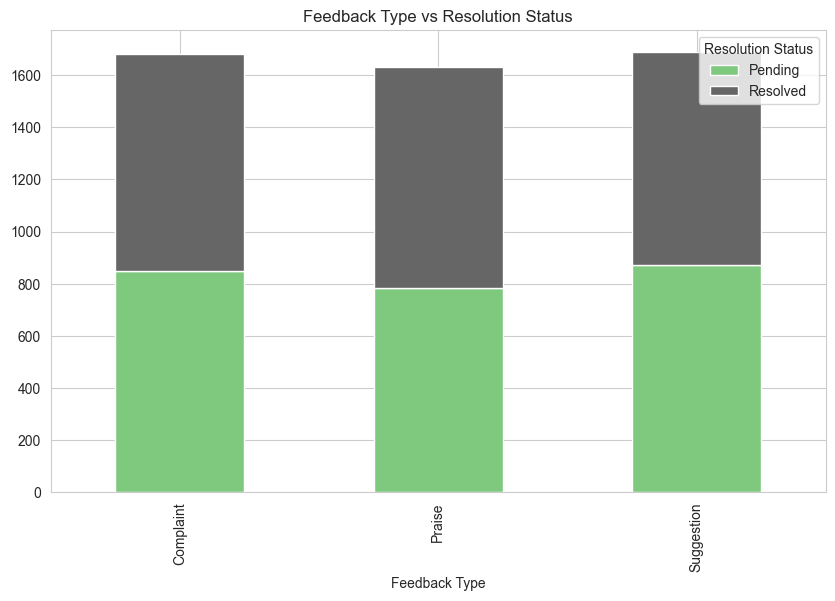

In [29]:
feedback_resolution = df.groupby(['Feedback Type', 'Resolution Status']).size().unstack().fillna(0)
feedback_resolution.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title('Feedback Type vs Resolution Status')

Text(0.5, 1.0, 'Correlation Heatmap')

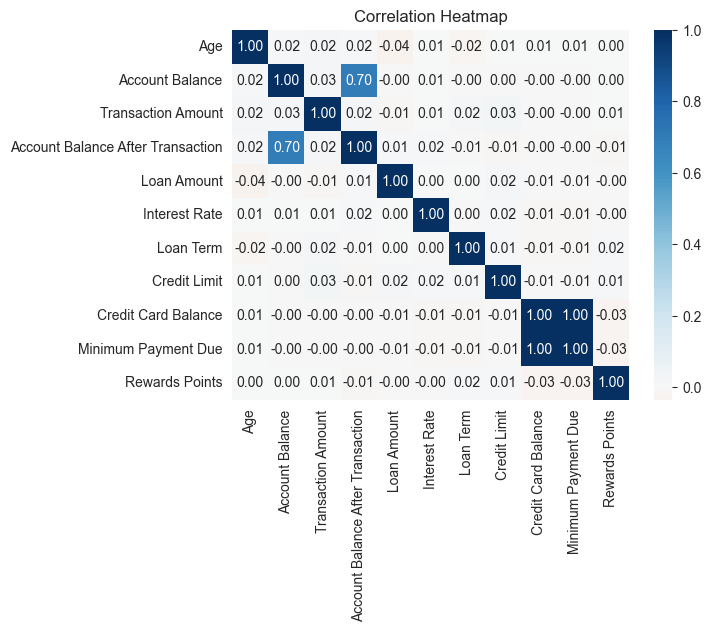

In [30]:
num_cols = ['Age', 'Account Balance', 'Transaction Amount', 
            'Account Balance After Transaction', 'Loan Amount',
            'Interest Rate', 'Loan Term', 'Credit Limit',
            'Credit Card Balance', 'Minimum Payment Due', 'Rewards Points']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title('Correlation Heatmap')

## Numerical Features vs Loan Status

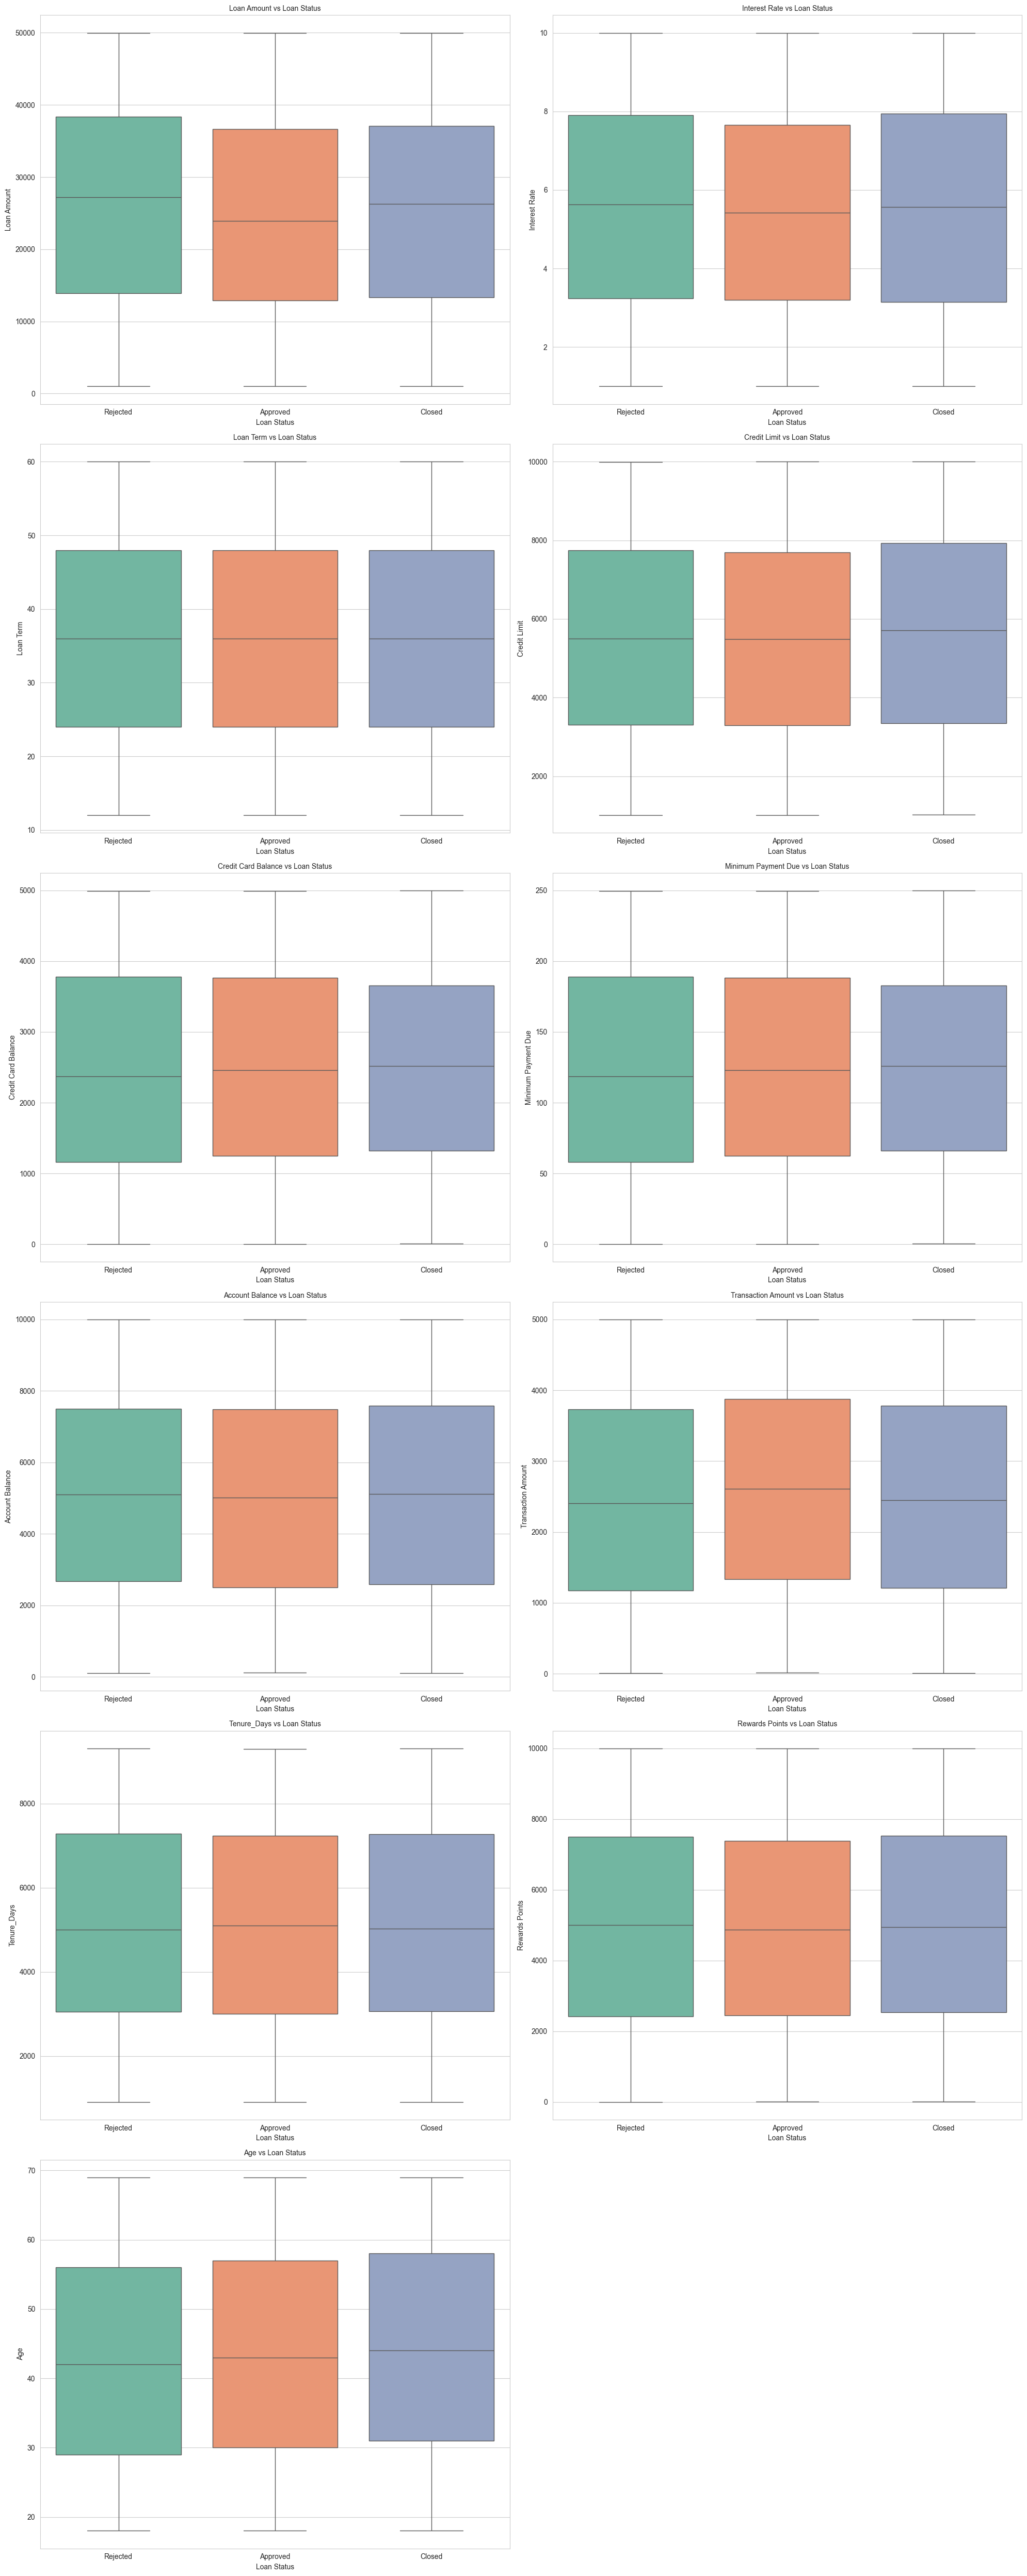

In [31]:
numerical_features = [
    'Loan Amount', 'Interest Rate', 'Loan Term', 'Credit Limit', 
    'Credit Card Balance', 'Minimum Payment Due', 'Account Balance', 
    'Transaction Amount', 'Tenure_Days', 'Rewards Points', 'Age'
]

plt.figure(figsize=(20, 50))
for idx, feature in enumerate(numerical_features):
    plt.subplot(6, 2, idx + 1)
    sns.boxplot(x='Loan Status', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Loan Status', fontsize=10)
    plt.tight_layout()
plt.show()


## Categorical Features vs Loan Status

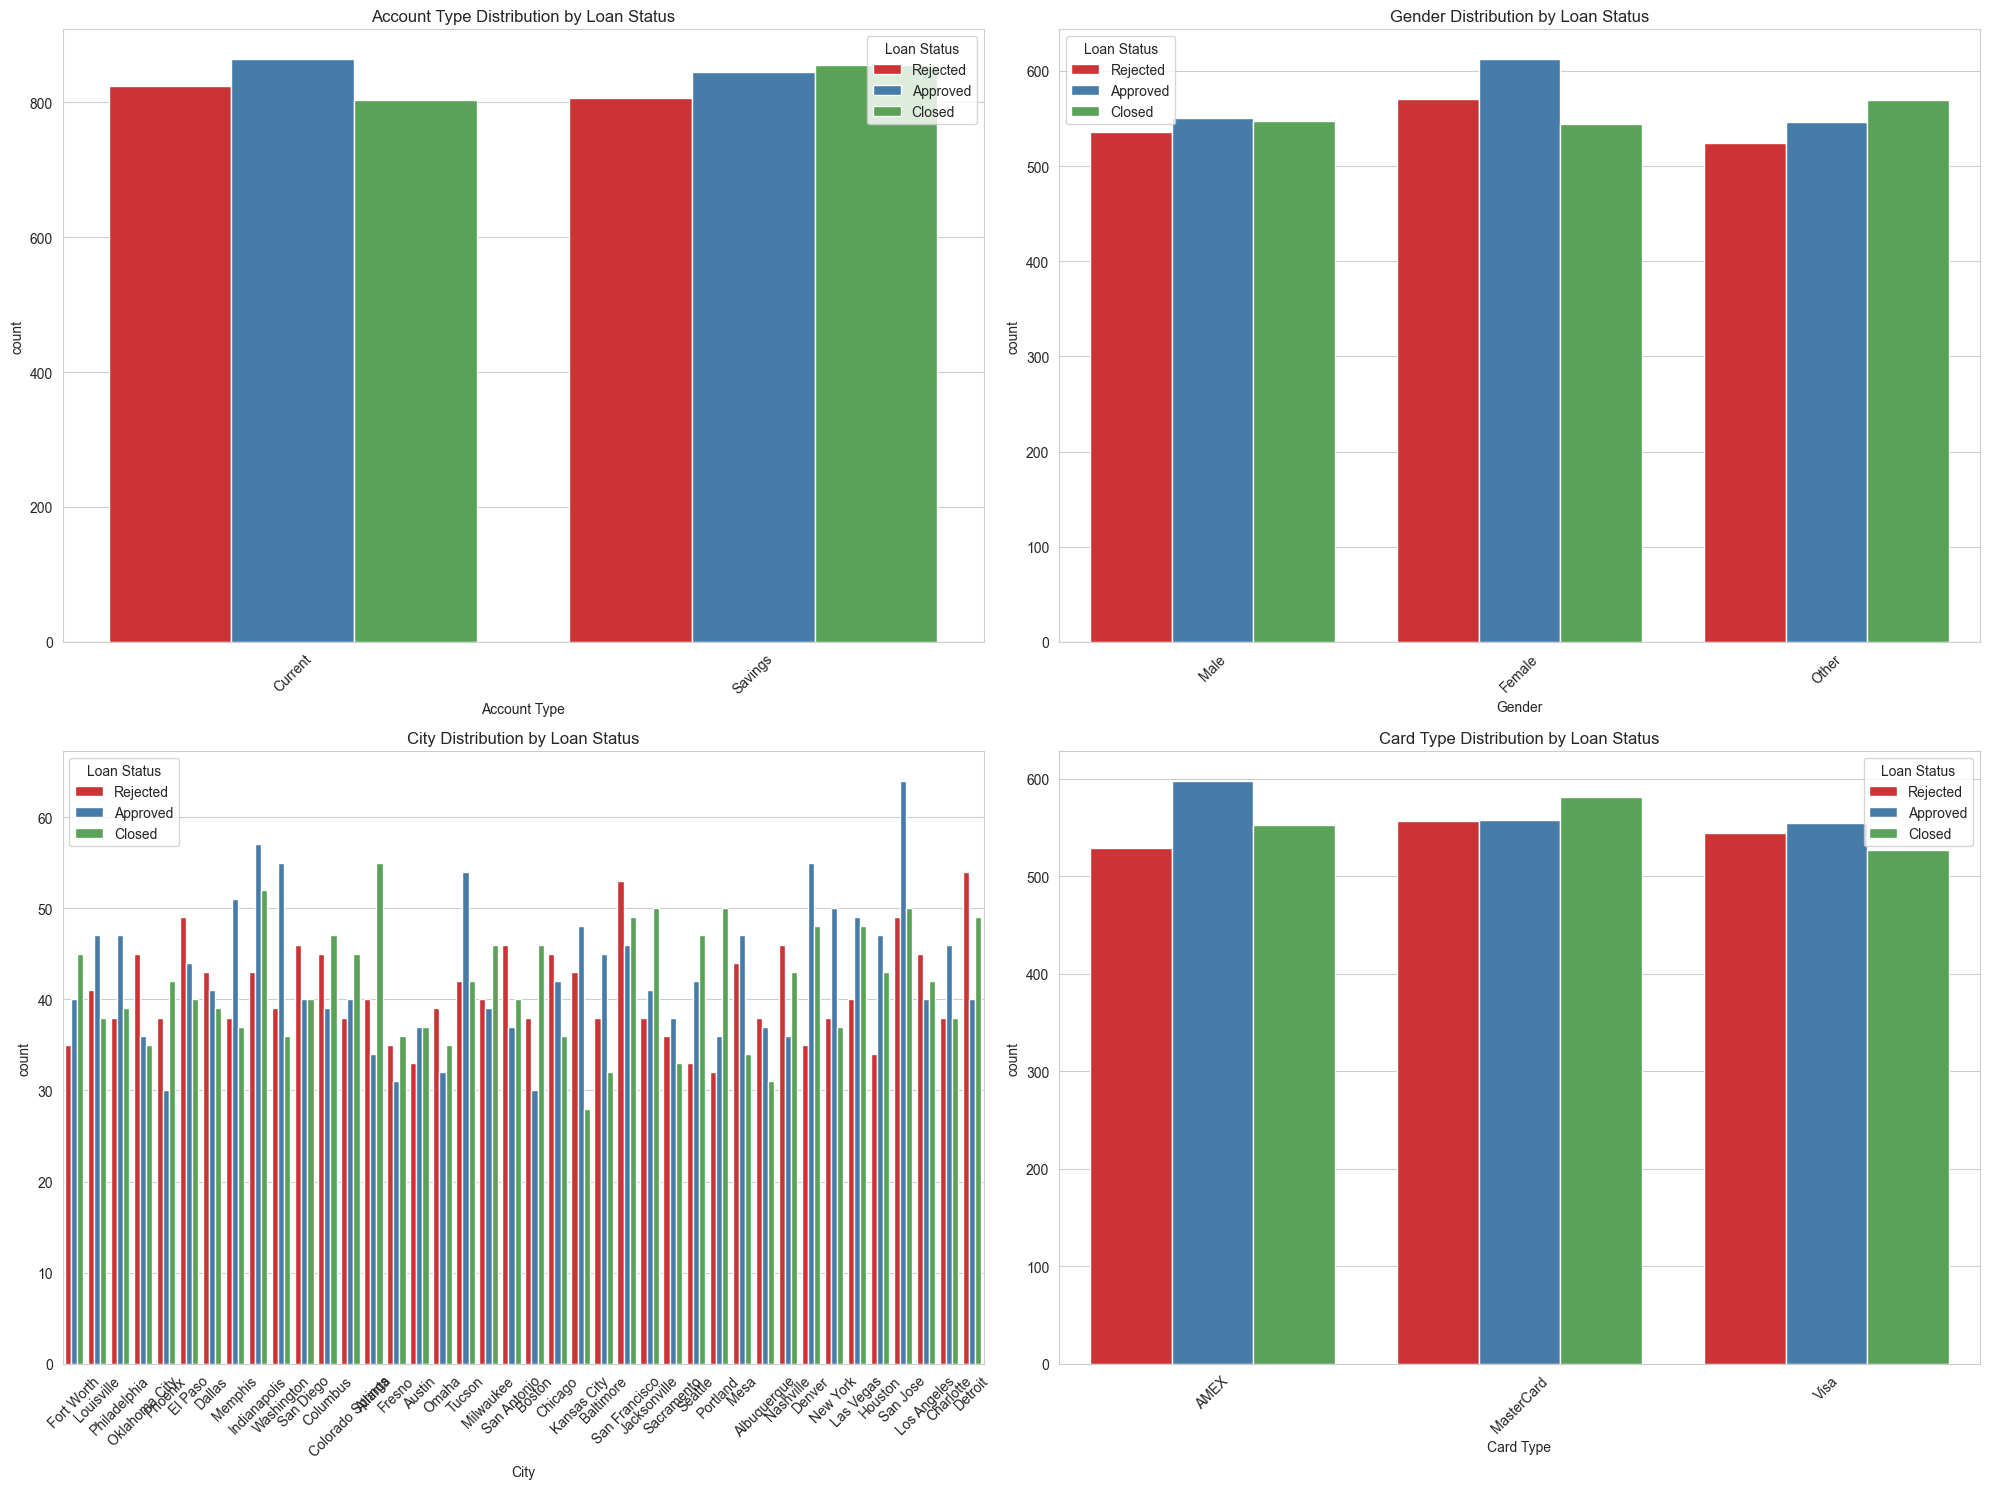

In [32]:
categorical_features = ['Account Type', 'Gender', 'City', 'Card Type']

plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features):
    plt.subplot(2, 2, idx + 1)
    sns.countplot(x=feature, hue='Loan Status', data=df, palette='Set1')
    plt.title(f'{feature} Distribution by Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


In [33]:

# comparison of approval rate
approval_rate_by_anomaly = df.groupby('Anomaly')['Loan Status'].value_counts(normalize=True).unstack()
print(approval_rate_by_anomaly)


Loan Status  Approved    Closed  Rejected
Anomaly                                  
0            0.360000  0.306667  0.333333
1            0.340851  0.333617  0.325532


The differences in loan approval, closure, and rejection rates between anomalous (0) and non-anomalous (1) entries are minimal:

Approval Rate: 36.0% (anomaly) vs. 34.1% (non-anomaly)

Rejection Rate: 33.3% vs. 32.6%

Closure Rate: 30.7% vs. 33.4%

These margins are all less than ~3%, indicating that loan decisions were not significantly influenced by the anomaly detection flag in this dataset. The near-identical loan status distributions across anomaly groups show low discriminative power. Including the column may not contribute meaningfully to model performance and could introduce noise or redundancy.

In [34]:
df.columns

Index(['Age', 'Gender', 'City', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'Transaction Date',
       'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term', 'Approval/Rejection Date', 'Loan Status',
       'Card Type', 'Credit Limit', 'Credit Card Balance',
       'Minimum Payment Due', 'Payment Due Date',
       'Last Credit Card Payment Date', 'Rewards Points', 'Feedback Date',
       'Feedback Type', 'Resolution Status', 'Resolution Date', 'Anomaly',
       'Tenure_Days', 'Month'],
      dtype='object')

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:blue;overflow:hidden; font-family: 'Tahoma'"><b> Model Building </b></div>
<a id="model"></a>

In [43]:
df = df[df['Loan Status'].isin(['Approved', 'Rejected'])] 
df['Loan_Status_Binary'] = df['Loan Status'].map({'Approved': 1, 'Rejected': 0})



🔧 Training SVM...

 SVM Classification Report:
              precision    recall  f1-score   support

           0     0.5103    0.4571    0.4822       326
           1     0.5293    0.5819    0.5543       342

    accuracy                         0.5210       668
   macro avg     0.5198    0.5195    0.5183       668
weighted avg     0.5200    0.5210    0.5191       668

Accuracy: 0.5210 |  ROC AUC: 0.5193

🔧 Training Random Forest...

 Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.5141    0.5031    0.5085       326
           1     0.5358    0.5468    0.5412       342

    accuracy                         0.5254       668
   macro avg     0.5250    0.5249    0.5249       668
weighted avg     0.5252    0.5254    0.5253       668

Accuracy: 0.5254 |  ROC AUC: 0.5362

🔧 Training Logistic Regression...

 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.5000

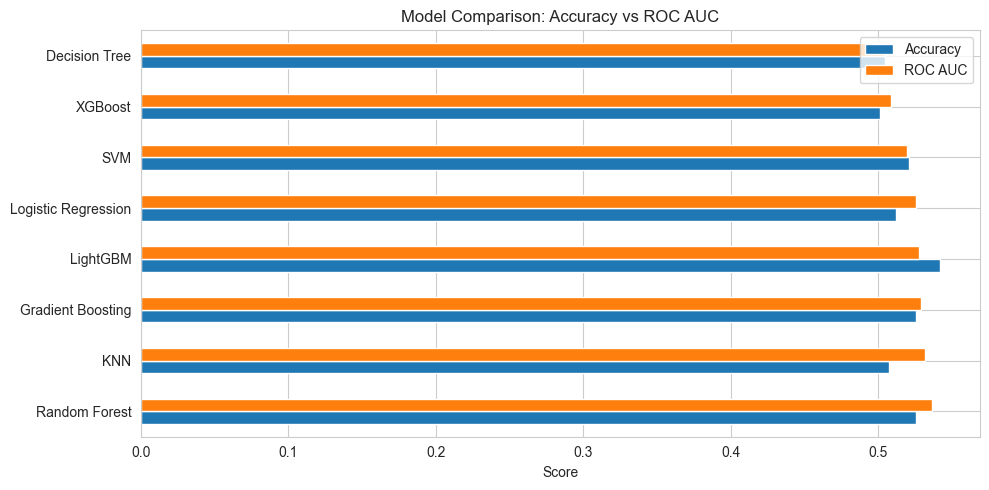

In [54]:

# Define Features and Target
features = [
    'Account Balance', 'Age', 'Account Type', 'Loan Amount',
    'Interest Rate', 'Transaction Amount', 'Loan Term'
]
target = 'Loan_Status_Binary'

#  Select only necessary columns
df_model = df[features + [target]].copy()

#  Drop missing values or use imputation
df_model.dropna(inplace=True) 

X = df_model[features]
y = df_model[target]

#  Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#  Column types
categorical_cols = ['Account Type']
numerical_cols = [col for col in features if col not in categorical_cols]


#  Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_cols),

    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # ✅ Handle unknowns
    ]), categorical_cols)
])


#  Define Models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and Evaluate Models
results = {}

for name, clf in models.items():
    print(f"\n🔧 Training {name}...")
    
    # Full pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] 
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
   
    results[name] = {"Accuracy": acc, "ROC AUC": auc}
    
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print(f"Accuracy: {acc:.4f} |  ROC AUC: {auc:.4f}")

# Results Summary
results_df = pd.DataFrame(results).T.sort_values(by="ROC AUC", ascending=False)
print("\n Model Performance Summary:")
print(results_df)

#  Plot
import matplotlib.pyplot as plt

results_df.plot(kind='barh', figsize=(10, 5), title='Model Comparison: Accuracy vs ROC AUC')
plt.xlabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


# <div style="padding:10px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:5px;background-color:Red;overflow:hidden; font-family: 'Tahoma'"><b> Model Saving </b></div>
<a id="saving"></a>

In [55]:
#  LightGBM Pipeline 
lightgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

# Train the Pipeline
lightgbm_pipeline.fit(X_train, y_train)

#  Save to Pickle 
with open("lightgbm_model.pkl", "wb") as f:
    pickle.dump(lightgbm_pipeline, f)


[LightGBM] [Info] Number of positive: 1368, number of negative: 1304
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.354718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 2672, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511976 -> initscore=0.047913
[LightGBM] [Info] Start training from score 0.047913


In [58]:
df = pd.read_csv('Comprehensive_Banking_Database.csv')
df.tail()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
4995,4996,Emily,Sanchez,21,Other,Address_4996,Mesa,19458799849,emily.sanchez@kag.com,Savings,...,100.86,7/19/2023,2/10/2023,7530,4996,4/12/2023,Complaint,Pending,1/23/2023,1
4996,4997,Melissa,Perez,27,Female,Address_4997,Los Angeles,19458799850,melissa.perez@kag.com,Savings,...,42.67,2/16/2023,12/24/2023,8796,4997,9/7/2023,Complaint,Pending,9/17/2023,1
4997,4998,Timothy,Walker,45,Female,Address_4998,Louisville,19458799851,timothy.walker@kag.com,Current,...,11.42,2/23/2023,9/6/2023,9966,4998,10/23/2023,Suggestion,Resolved,2/5/2023,1
4998,4999,Deborah,Nelson,58,Female,Address_4999,Detroit,19458799852,deborah.nelson@kag.com,Current,...,16.27,9/8/2023,1/12/2023,538,4999,5/20/2023,Complaint,Pending,3/3/2023,1
4999,5000,Daniel,Martinez,35,Male,Address_5000,El Paso,19458799853,daniel.martinez@kag.com,Current,...,153.90,5/30/2023,6/3/2023,1816,5000,9/6/2023,Suggestion,Resolved,5/23/2023,1


In [62]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Comprehensive_Banking_Database.csv")  # Replace with your file path if needed

# Display all information about the first person
first_person_info = df.iloc[50]

# Print full details in a readable format
print("=== Information about the first person in the dataset ===")
print(first_person_info)


=== Information about the first person in the dataset ===
Customer ID                                          51
First Name                                         Mary
Last Name                                         Smith
Age                                                  61
Gender                                            Other
Address                                      Address_51
City                                          Nashville
Contact Number                              19458794904
Email                                mary.smith@kag.com
Account Type                                    Current
Account Balance                                 9123.83
Date Of Account Opening                        9/7/2021
Last Transaction Date                         3/14/2023
TransactionID                                        51
Transaction Date                              8/25/2023
Transaction Type                             Withdrawal
Transaction Amount                            